C:\Program Files\Tesseract-OCR

In [1]:
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
import os
os.getcwd()
path = "transform/trans1.jpg"

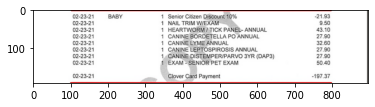

In [7]:
img = cv2.imread('transform/trans1.jpg')
plt.imshow(img)

In [8]:
#those are preprocessing functions , in my case I only needed first one

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## noise removal
#def remove_noise(image):
#    return cv2.medianBlur(image,5)
# 
##thresholding
#def thresholding(image):
#    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#
##dilation
#def dilate(image):
#    kernel = np.ones((5,5),np.uint8)
#    return cv2.dilate(image, kernel, iterations = 1)
#    
##erosion
#def erode(image):
#    kernel = np.ones((5,5),np.uint8)
#    return cv2.erode(image, kernel, iterations = 1)
#
##opening - erosion followed by dilation
#def opening(image):
#    kernel = np.ones((5,5),np.uint8)
#    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
#
##canny edge detection
#def canny(image):
#    return cv2.Canny(image, 100, 200)
#
##skew correction
#def deskew(image):
#    coords = np.column_stack(np.where(image > 0))
#    angle = cv2.minAreaRect(coords)[-1]
#    if angle < -45:
#        angle = -(90 + angle)
#    else:
#        angle = -angle
#    (h, w) = image.shape[:2]
#    center = (w // 2, h // 2)
#    M = cv2.getRotationMatrix2D(center, angle, 1.0)
#    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
#    return rotated
#
#template matching
#def match_template(image, template):
    #return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [9]:
im=get_grayscale(img)
#im=remove_noise(im)
#im=thresholding(im)
#im=dilate(im)
#im=erode(im)
#im=opening(im)
#im=canny(im)
#im=deskew(im)


In [10]:
int(im.shape[1]/im.shape[0])

4

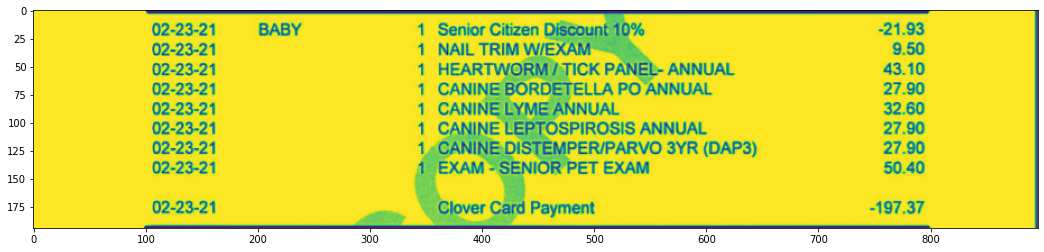

In [11]:
plt.figure(figsize=(20,int(im.shape[1]/im.shape[0])))
plt.imshow(im)
plt.show()

In [12]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(im, config=custom_config)

'02-23-21 BABY 1 Senior Citizen Discount 10% -21.93\n02-23-21 1 NAIL TRIM WIEXAM: 9.50\n02-23-21 1 HEARTWORM /iTICK PANEL- ANNUAL 43.10\n02-23-21 1 CANINE/BORDETELLA PO ANNUAL 27.90\n02-23-21 1 CANINE LYME ANNUAL. 32.60\n02-23-21 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n02-23-21 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n02-23-21 4 EXAM = SENIOR PET EXAM 50.40\n02-23-21 Clover Card Payment 197.37\n'

In [13]:
text =pytesseract.image_to_string(im, config=custom_config)

In [14]:
import re

In [15]:
print(text)

02-23-21 BABY 1 Senior Citizen Discount 10% -21.93
02-23-21 1 NAIL TRIM WIEXAM: 9.50
02-23-21 1 HEARTWORM /iTICK PANEL- ANNUAL 43.10
02-23-21 1 CANINE/BORDETELLA PO ANNUAL 27.90
02-23-21 1 CANINE LYME ANNUAL. 32.60
02-23-21 1 CANINE LEPTOSPIROSIS ANNUAL 27.90
02-23-21 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90
02-23-21 4 EXAM = SENIOR PET EXAM 50.40
02-23-21 Clover Card Payment 197.37



In [16]:
pattern_date =re.compile(r"\d*-\d*-\d*")
matches_date = pattern_date.findall(text)

In [17]:
matches_date

['02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21']

In [18]:
pattern_name = re.compile(r"\d\d [A-Za-z]* \d")
matches_name = pattern_name.findall(text)

In [19]:
matches_name

['21 BABY 1']

In [20]:
for i in matches_name:
    print(i)

21 BABY 1


In [21]:
matches_name_str =str(matches_name)

In [22]:
matches_name_str

"['21 BABY 1']"

In [23]:
pattern_name2 = re.compile(r"[A-Za-z]+")
matches_name2 = pattern_name2.findall(matches_name_str)

In [24]:
matches_name, matches_name2

(['21 BABY 1'], ['BABY'])

In [25]:
for i in matches_name2:
    if i in text:
        text =text.replace(i,"")

In [26]:
text

'02-23-21  1 Senior Citizen Discount 10% -21.93\n02-23-21 1 NAIL TRIM WIEXAM: 9.50\n02-23-21 1 HEARTWORM /iTICK PANEL- ANNUAL 43.10\n02-23-21 1 CANINE/BORDETELLA PO ANNUAL 27.90\n02-23-21 1 CANINE LYME ANNUAL. 32.60\n02-23-21 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n02-23-21 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n02-23-21 4 EXAM = SENIOR PET EXAM 50.40\n02-23-21 Clover Card Payment 197.37\n'

In [27]:
for i in matches_date:
    text =text.replace(i,"")
    

In [28]:
text

'  1 Senior Citizen Discount 10% -21.93\n 1 NAIL TRIM WIEXAM: 9.50\n 1 HEARTWORM /iTICK PANEL- ANNUAL 43.10\n 1 CANINE/BORDETELLA PO ANNUAL 27.90\n 1 CANINE LYME ANNUAL. 32.60\n 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n 4 EXAM = SENIOR PET EXAM 50.40\n Clover Card Payment 197.37\n'

In [29]:
pattern_desc =re.compile(r" \D+.* ")
matches_desc =pattern_desc.findall(text)

In [30]:
matches_desc

['  1 Senior Citizen Discount 10% ',
 ' NAIL TRIM WIEXAM: ',
 ' HEARTWORM /iTICK PANEL- ANNUAL ',
 ' CANINE/BORDETELLA PO ANNUAL ',
 ' CANINE LYME ANNUAL. ',
 ' CANINE LEPTOSPIROSIS ANNUAL ',
 ' DISTEMPER/PARVO 3YR (DAP3) ',
 ' EXAM = SENIOR PET EXAM ',
 ' Clover Card Payment ']

In [31]:
#for i in matches_name2:
    #if matches_name2[0] ==matches_desc[0]:
        #matches_desc.pop(0)

In [32]:
text

'  1 Senior Citizen Discount 10% -21.93\n 1 NAIL TRIM WIEXAM: 9.50\n 1 HEARTWORM /iTICK PANEL- ANNUAL 43.10\n 1 CANINE/BORDETELLA PO ANNUAL 27.90\n 1 CANINE LYME ANNUAL. 32.60\n 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n 4 EXAM = SENIOR PET EXAM 50.40\n Clover Card Payment 197.37\n'

In [33]:
pattern_net =re.compile(r"-?\d+\.\d\d")
matches_net =pattern_net.findall(text)

In [34]:
matches_net

['-21.93',
 '9.50',
 '43.10',
 '27.90',
 '32.60',
 '27.90',
 '27.90',
 '50.40',
 '197.37']

In [35]:
matches_name2

['BABY']

In [36]:
InvoicePetName = [i for i in matches_name2]
InvoicePetName

['BABY']

In [37]:
InvoicePetName= InvoicePetName *len(matches_net)

In [38]:
matches_date = [i.replace("-","/") for i in matches_date]
print(matches_date)

['02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21']


In [39]:
FileName =[path]
print(FileName)
FileName = FileName*len(matches_date)
print(FileName)

['transform/trans1.jpg']
['transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg', 'transform/trans1.jpg']


In [40]:
stupci = {"InvoicePetName": InvoicePetName, "TransactionDate": matches_date, "ItemDescription":matches_desc,"NetPrice":matches_net, "FileName":FileName}  

In [41]:
headers =[]
for key, value in stupci.items() :
    headers.append(key)
print(headers)

['InvoicePetName', 'TransactionDate', 'ItemDescription', 'NetPrice', 'FileName']


In [42]:
stupci

{'InvoicePetName': ['BABY',
  'BABY',
  'BABY',
  'BABY',
  'BABY',
  'BABY',
  'BABY',
  'BABY',
  'BABY'],
 'TransactionDate': ['02/23/21',
  '02/23/21',
  '02/23/21',
  '02/23/21',
  '02/23/21',
  '02/23/21',
  '02/23/21',
  '02/23/21',
  '02/23/21'],
 'ItemDescription': ['  1 Senior Citizen Discount 10% ',
  ' NAIL TRIM WIEXAM: ',
  ' HEARTWORM /iTICK PANEL- ANNUAL ',
  ' CANINE/BORDETELLA PO ANNUAL ',
  ' CANINE LYME ANNUAL. ',
  ' CANINE LEPTOSPIROSIS ANNUAL ',
  ' DISTEMPER/PARVO 3YR (DAP3) ',
  ' EXAM = SENIOR PET EXAM ',
  ' Clover Card Payment '],
 'NetPrice': ['-21.93',
  '9.50',
  '43.10',
  '27.90',
  '32.60',
  '27.90',
  '27.90',
  '50.40',
  '197.37'],
 'FileName': ['transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg',
  'transform/trans1.jpg']}

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame(stupci)

In [45]:
#And final solution;
df

,InvoicePetName,TransactionDate,ItemDescription,NetPrice,FileName
0,BABY,02/23/21,1 Senior Citizen Discount 10%,-21.93,transform/trans1.jpg
1,BABY,02/23/21,NAIL TRIM WIEXAM:,9.50,transform/trans1.jpg
2,BABY,02/23/21,HEARTWORM /iTICK PANEL- ANNUAL,43.10,transform/trans1.jpg
3,BABY,02/23/21,CANINE/BORDETELLA PO ANNUAL,27.90,transform/trans1.jpg
4,BABY,02/23/21,CANINE LYME ANNUAL.,32.60,transform/trans1.jpg
5,BABY,02/23/21,CANINE LEPTOSPIROSIS ANNUAL,27.90,transform/trans1.jpg
6,BABY,02/23/21,DISTEMPER/PARVO 3YR (DAP3),27.90,transform/trans1.jpg
7,BABY,02/23/21,EXAM = SENIOR PET EXAM,50.40,transform/trans1.jpg
8,BABY,02/23/21,Clover Card Payment,197.37,transform/trans1.jpg


In [46]:
df.to_csv("txt/file1.csv")